# **Netflix Movies And  Shows Clustering**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Praful/NETFLIX.csv',encoding='latin-1')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# **Data Exploration**

In [5]:
df.shape

(7787, 12)

In [6]:
#check columns name 
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# check basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# check statistical summary of dataset
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
# unique values present in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [10]:
# Check is there any missing value present in dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Yes there are some missing values present in dataset.

In [11]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null values: {}%".format(i,round(null_rate,2)))

director null values: 30.68%
cast null values: 9.22%
country null values: 6.51%
date_added null values: 0.13%
rating null values: 0.09%


**Convert date into datetime format**

In [12]:
df["date_added"]= pd.to_datetime(df["date_added"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### **Handling Missing values**

In [15]:
df.fillna({'rating': 'Unavailable', 'cast':'Unavailable', 'country':'Unavailable','director':'Unavailable'},inplace=True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [16]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Ã...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


**We have to replace date NaT values by most recent dates. Because Netflilx has tendency to add more content over time.**

In [17]:
most_recent_entry = df["date_added"].max()
df.fillna({"date_added": most_recent_entry}, inplace=True)

In [18]:
df[df.show_id=='s5137']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5136,s5137,Movie,Red Trees,Marina Willer,Tim Piggott-Smith,United Kingdom,2018-03-24,2017,TV-PG,80 min,"Documentaries, International Movies",A documentarian details her Jewish family's es...


In [19]:
# shift rating values in to duration 
df.loc[df["director"]== 'Louis C.K.', 'duration']= df['rating']
df[df.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,Unavailable,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,Unavailable,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,Unavailable,Movies,The comic puts his trademark hilarious/thought...


In [20]:
#replace rating values by unavilable
df.loc[df["director"]== 'Louis C.K.', 'rating']= 'Unavilable'
df[df.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavilable,Unavailable,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavilable,Unavailable,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavilable,Unavailable,Movies,The comic puts his trademark hilarious/thought...


In [21]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Missing values handle successfully.



*   **Type of Shows**













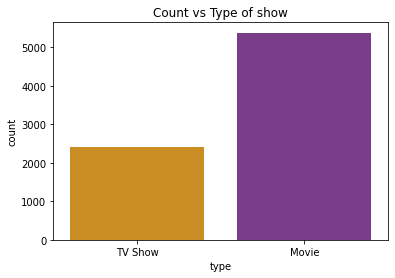

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [22]:
sns.countplot(df.type, palette="CMRmap_r")
plt.title("Count vs Type of show")
plt.show()
df.type.value_counts()   #show count of values

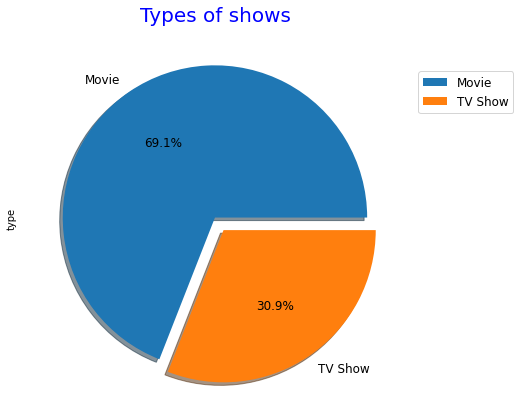

In [23]:
explode = (0, 0.1)
df['type'].value_counts().to_frame().sort_values('type', axis=0, ascending= False).plot(kind= 'pie',
                                                subplots=True, explode = explode,figsize=(7,7), shadow=True, 
                                                textprops={'fontsize':12,'weight':'light','color':'k'},
                                                autopct='%1.1f%%')


plt.title('Types of shows', fontsize= 20, color= 'b')
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)  #location of legend
plt.show()

**Country Analysis**

In [24]:
country = df.country.value_counts().sort_values(ascending=False).head(10)
country

United States     2555
India              923
Unavailable        507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

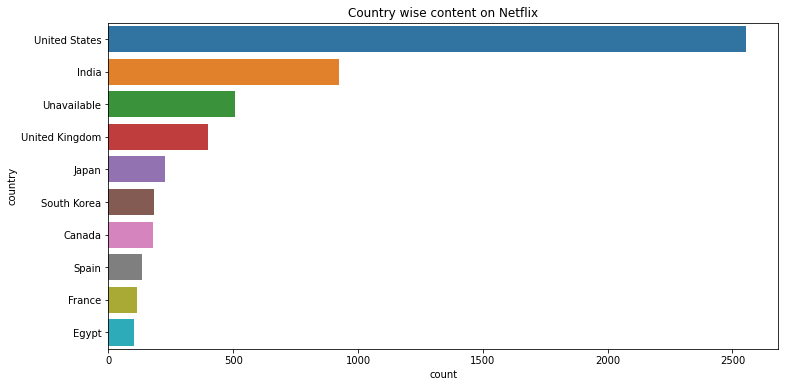

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', order= df.country.value_counts().index[0:10], data= df)
plt.title("Country wise content on Netflix")
plt.show()

In [26]:
a= df["country"].value_counts().index[0:15]

for i in a:
    df["country"]== i 
    c= df["country"].value_counts()[:10].reset_index(name='counts')

pieChart = px.pie(c, values='counts', names='index',
 title='Country wise content on Netflix')
pieChart.show()

**Now Check type of content based on country**

In [27]:
movies= df[df.type=="Movie"]
TV_shows = df[df.type=="TV Show"]

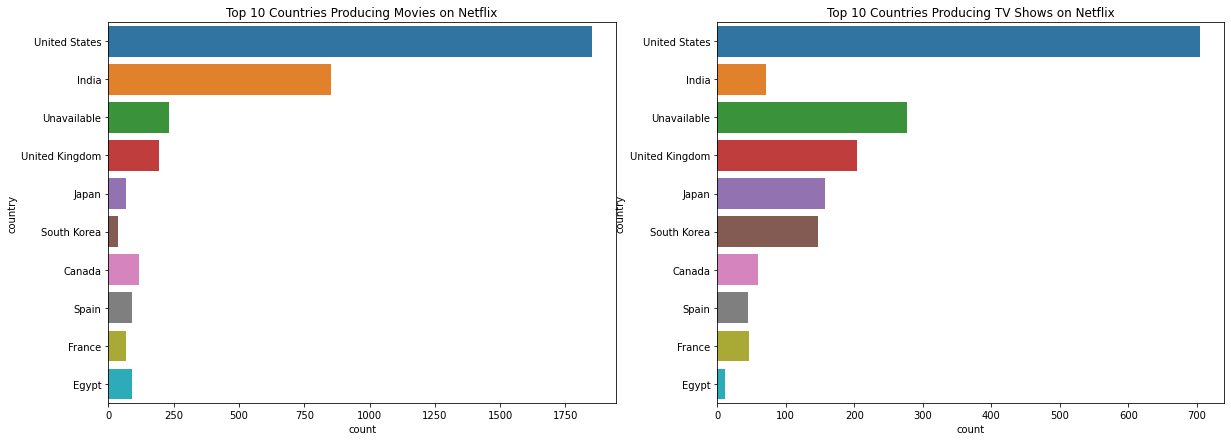

In [28]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(y="country", order=df["country"].value_counts().index[0:10], data= movies)
plt.title("Top 10 Countries Producing Movies on Netflix")


plt.subplot(1,2,2)
sns.countplot(y="country", order=df["country"].value_counts().index[0:10], data= TV_shows)
plt.title("Top 10 Countries Producing TV Shows on Netflix")
plt.show()


* Above plot shows the Movies and TV shows produced by countries.

* United states has produced more movies as well as TV shows than other countries followed by India.

# **Distribution of content Rating**

In [29]:
df.rating.value_counts()

TV-MA          2863
TV-14          1931
TV-PG           806
R               665
PG-13           386
TV-Y            280
TV-Y7           271
PG              247
TV-G            194
NR               84
G                39
TV-Y7-FV          6
UR                5
Unavailable       4
NC-17             3
Unavilable        3
Name: rating, dtype: int64

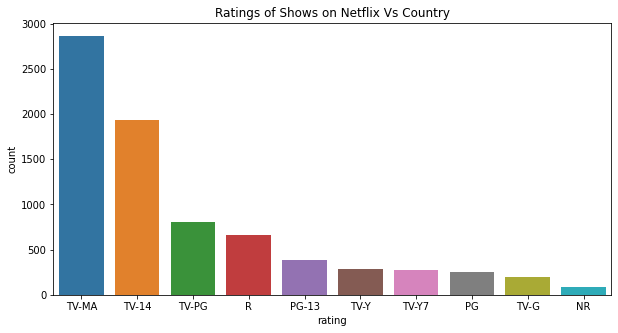

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df.rating, order= df["rating"].value_counts().index[0:10])
plt.title("Ratings of Shows on Netflix Vs Country")
plt.show()

In [31]:
z = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating',
 title='Distribution of Content Ratings on Netflix')
pieChart.show()

The above pie chart shows the majority of content on Netflix is "TV-MA", Its means most of the content avialble on Netflix is intended for viewing by mature and adult audiences.

# **Duration**

* **Duration of Movies** 

In [32]:
movies["duration"] = movies.duration.str.replace(" min",'')
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


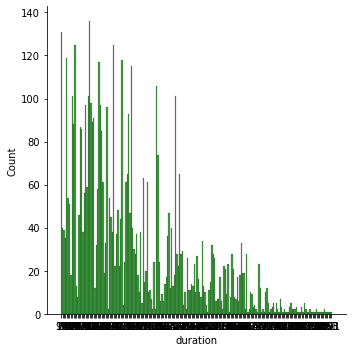

duration
90     136
93     131
94     125
91     125
95     119
92     118
97     117
96     115
98     106
99     101
88     101
103    101
102     98
106     97
100     97
dtype: int64

In [33]:
#check distribution of duration of movies and value counts. 
sns.displot(movies.duration,color='green')
plt.show()
movies.value_counts("duration")[0:15]

From above plot we can see that the majority of the movies range in length from 90 to 100 minutes.

**Season of TV shows**

In [34]:
# rename column name "duration" into "season"
TV_shows.rename(columns={'duration':'season'}, inplace = True)

In [35]:
#replace stings from columns like "Season", "Seasons", "s"
TV_shows["season"] = TV_shows.season.str.replace("Season",'')
TV_shows["season"] = TV_shows.season.str.replace("Seasons",'')
TV_shows["season"] = TV_shows.season.str.replace("s",'')

In [36]:
TV_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,season,listed_in,description
0,s1,TV Show,3%,Unavailable,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...",Turkey,2017-07-01,2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,Unavailable,"Robert WiÄckiewicz, Maciej MusiaÅ, Michalina...","Poland, United States",2018-11-30,2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naÃ¯ve la..."
12,s13,TV Show,1994,Diego Enrique Osorno,Unavailable,Mexico,2019-05-17,2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,Unavailable,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unavailable,2019-03-20,2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


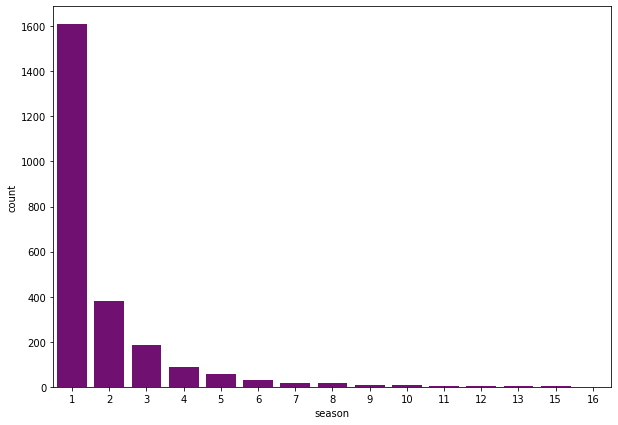

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(TV_shows.season.astype(int), color="purple")
plt.show()

from above plot we can see that the majority of TV shows have only **one season.**

## Years
* **Content Release in Year**

In [38]:
df.release_year.value_counts()[:15]

2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
2011     166
2009     137
2008     125
2007      85
2006      85
Name: release_year, dtype: int64

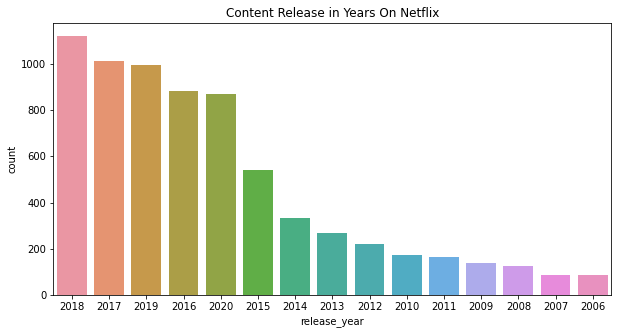

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(df.release_year, order= df["release_year"].value_counts().index[0:15])
plt.title("Content Release in Years On Netflix")
plt.show()

**In year 2018 has more content is release.**

In [40]:
a= df["release_year"].value_counts().index[0:15]

for i in a:
    df["release_year"]== i 
    c= df["release_year"].value_counts()[:10].reset_index(name='counts')

pieChart = px.pie(c, values='counts', names='index',
 title='Content Release in Years On Netflix')
pieChart.show()

**Popular Genres Analysis**

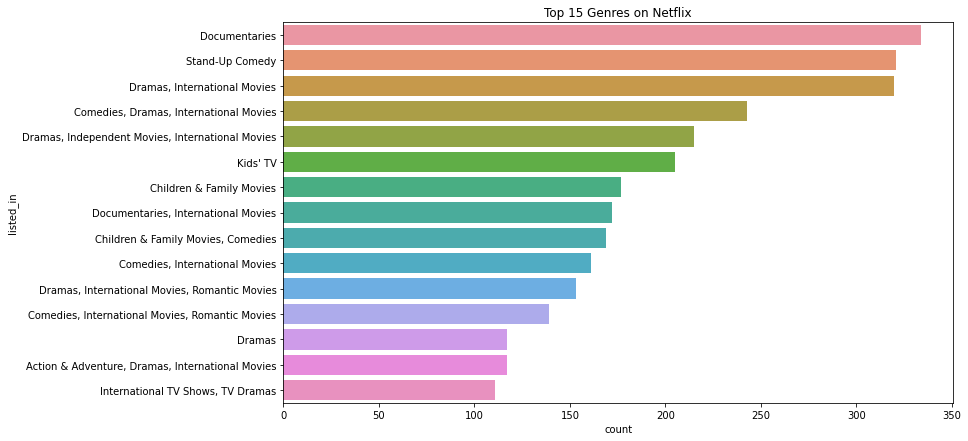

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(y= "listed_in", order= df["listed_in"].value_counts().index[0:15], data=df)
plt.title("Top 15 Genres on Netflix")
plt.show()

from above plot we can see that Dramas, International movies is most popular Genres followed by Documentries.

## **Top 5 Actors and Directors:**

Now see top 5 Directors.

In [42]:
filtered_directors=pd.DataFrame()
filtered_directors=df['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='Unavailable']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

In [43]:
filtered_cast=pd.DataFrame()
filtered_cast=df['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='Unavailable']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor',title='Top 5 Actors on Netflix')
fig2.show()

## Analyzing Content on Netflix:
Analyze the trend of production over the years on Netflix:

In [44]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
df2

,Release Year,type,Total Content
94,2010,Movie,136
95,2010,TV Show,37
96,2011,Movie,127
97,2011,TV Show,39
98,2012,Movie,158
99,2012,TV Show,61
100,2013,Movie,202
101,2013,TV Show,65
102,2014,Movie,244
103,2014,TV Show,90


In [45]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

## Sentimental Analysis

In [46]:
from textblob import TextBlob  # for sentiment analysis

In [47]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
 z=row['description']
 testimonial=TextBlob(z)
 p=testimonial.sentiment.polarity
 if p==0:
    sent='Neutral'
 elif p>0:
    sent='Positive'
 else:
    sent='Negative'
 dfx.loc[[index,2],'Sentiment']=sent
dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')
dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()


So the above graph shows that the overall positive content is always greater than the neutral and negative content combined.

# **Text pre-processing**
Text pre-processing is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc. There are different steps in text pre-processing like - removing stopwords and punctuations , stemming of words etc. Let us start the preprocessing task.

**a) Removing Punctuations:**- We need to carefully choose the list of punctuation which we are going to discard based on the use case.To remove punctuation let's create a function and apply them on our both variables

In [48]:
# import important libraries for text preprocessing
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [49]:

from nltk.parse import transitionparser
def remove_punctuation(text):
  ''' a function for removing punctuation'''
  import string
  # replacing the punctuations with no space
  # which in effect deletes the punctuation markes
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation markes 
  return text.translate(translator)


In [50]:
# Applying the function to remove punctuations
df['description'] = df['description'].apply(remove_punctuation)

# Applying the function to remove punctuations
df['listed_in'] = df['listed_in'].apply(remove_punctuation)

First step is over ! We have eliminated punctuations from the values of our both variables - 'description' and 'listed_in'. It is time to handle stopwords.

**b) Remove Stopwords** With english, among many popular languages, stop words are common words within sentences that do not add value and thus can be eliminated when cleaning for NLP prior to analysis.We will make good use of the NLTK library by importing the pre-programmed english stop words library.

In [51]:
#importing natural language tool kit
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

# Function to remove stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [53]:
# appling stopword function
df['description']= df['description'].apply(stopwords)

# Appling the stopword function
df['listed_in'] = df['listed_in'].apply( stopwords)

In [54]:
# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)  
     

In [55]:
#stemming for description
df['description'] = df['description'].apply(stemming)

## **d. Create New Variables for Text Length**

The text length is very likely to influence any kind of similarity score. In general:


String containing very few words will have their highest similarity scores with other short strings with which they share one or two words in common. However if the words they contain are not common at all, they will have a lot of zero similarity scores (possibly only zeros). Long strings (i.e. with many words) usually have low similarity scores, simply because they are unlikely to have a high proportion of their words in common. However compared to short strings they rarely have no word in common so they are much less likely to have lots of zero similarity scores. As a result strings of similar length may tend to cluster together, depending on the data.

In [56]:
# Create a function to display text length
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [57]:
# Create two variables for description and listed-in texts length respectively
df['desc_length'] = df['description'].apply(length)
df['listed_length'] = df['listed_in'].apply(length)

In [58]:
# Create a dataframe with variables indicating text lengths only
cluster_df=df.filter(['desc_length','listed_length'],axis=1)
cluster_df.head(2)

,desc_length,listed_length
0,82,49
1,88,27


**Rescaling Data**

We have seen time to time that generatlization of values is an important step before applying any model. Hence, we opt for standard scaler method for scaling values.

In [59]:

# Standardizing value to generalise
X_features_rec_mon=df[['desc_length','listed_length']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

Our text is preprocessed and ready for algorithms to be applied. Our first unsupervised algorith is - K-means Clustering.

**Implementing K-means**

K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.Let's go ahead and import important tools to apply K-mean clustering

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Now that we have scaled our data, our next step is to apply k-means clustering on our data. But Wait !! We have learned that to implement K-means algorithm one must know the appropriate numbers of cluster.

### **Finding Optimum Numbers of Clusters using Elbow Method**

The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10).

Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

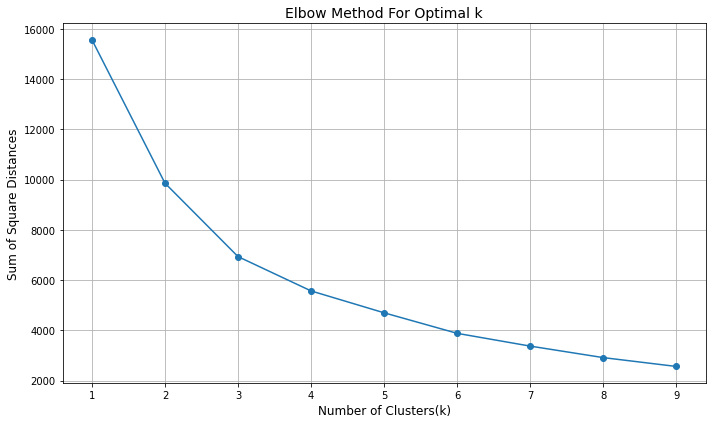

In [61]:
# Create a list
list_1 = []

# for loop to append kmeans inertia values
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    list_1.append(kmeans.inertia_)

#Plot linegraph
plt.figure(figsize=(10,6))

plt.plot(range(1,10),list_1,"-o")
plt.grid(True)
plt.xlabel("Number of Clusters(k)",fontsize=12)
plt.ylabel("Sum of Square Distances",fontsize=12)
plt.title("Elbow Method For Optimal k",fontsize=14)
plt.xticks(range(1,10))
plt.tight_layout()

In the above plot, the elbow is at k=3, indicating the optimal k for this dataset is 3. Let us visualise our data for different values of clusters , say 2,3,4,5,6,7,8 , for better understanding.

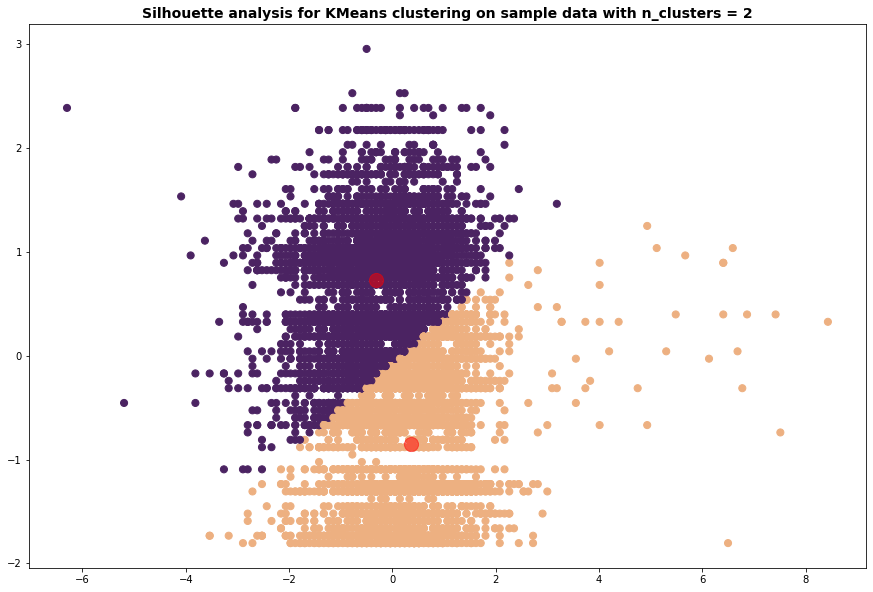

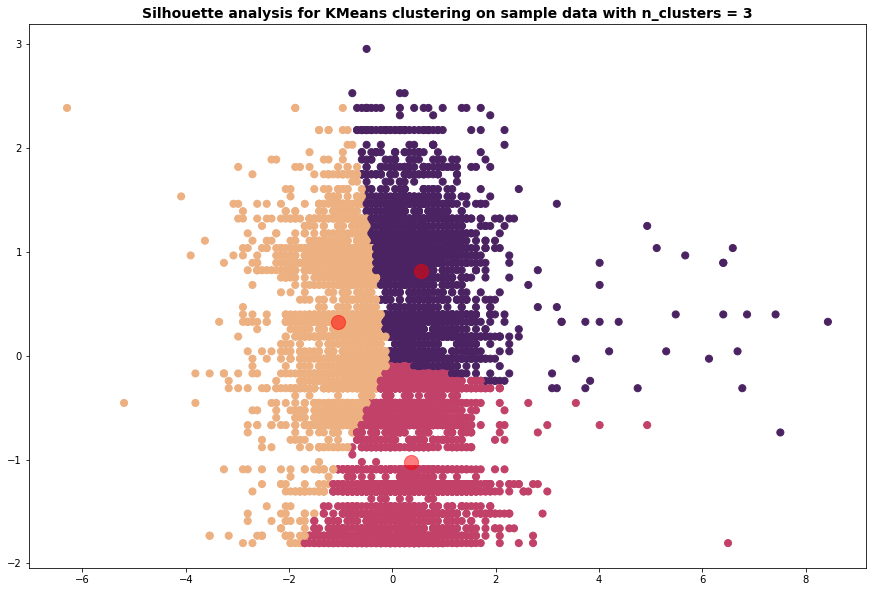

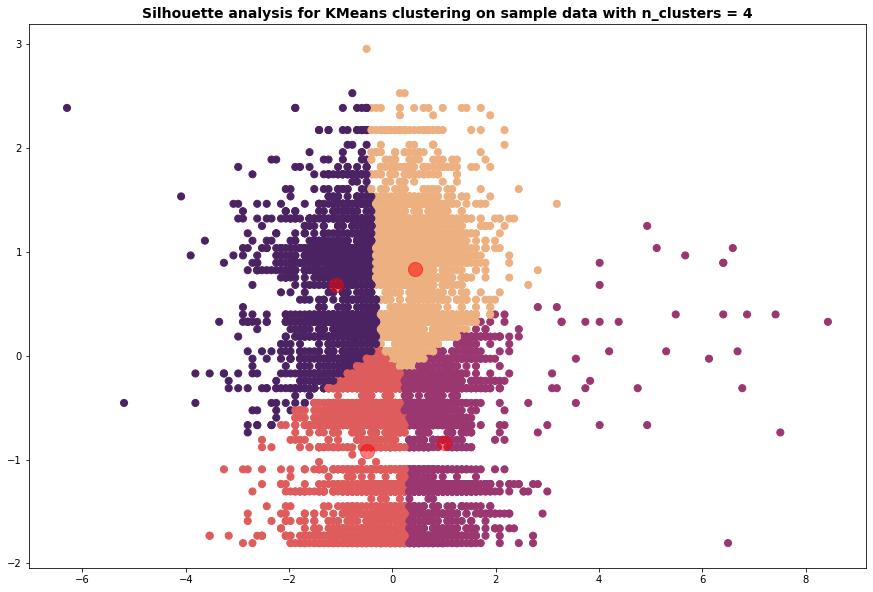

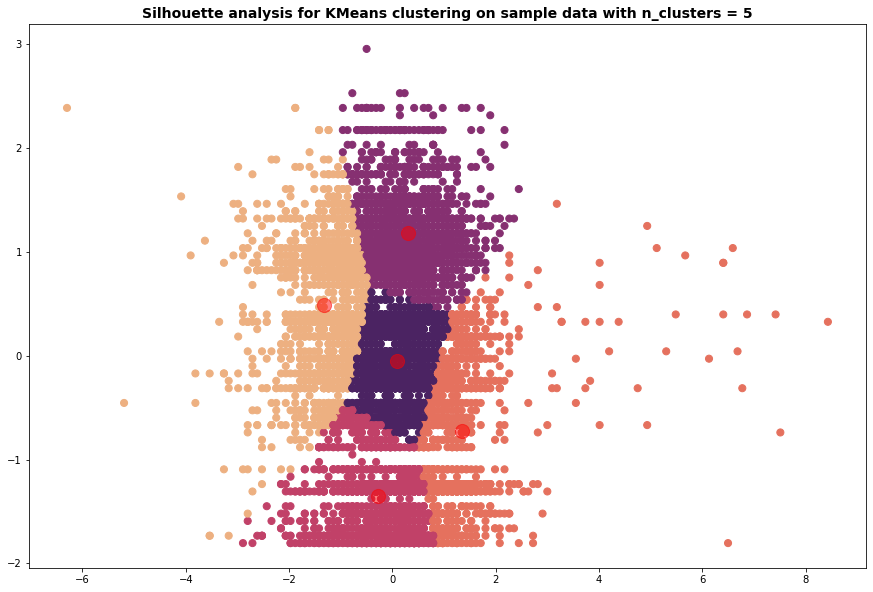

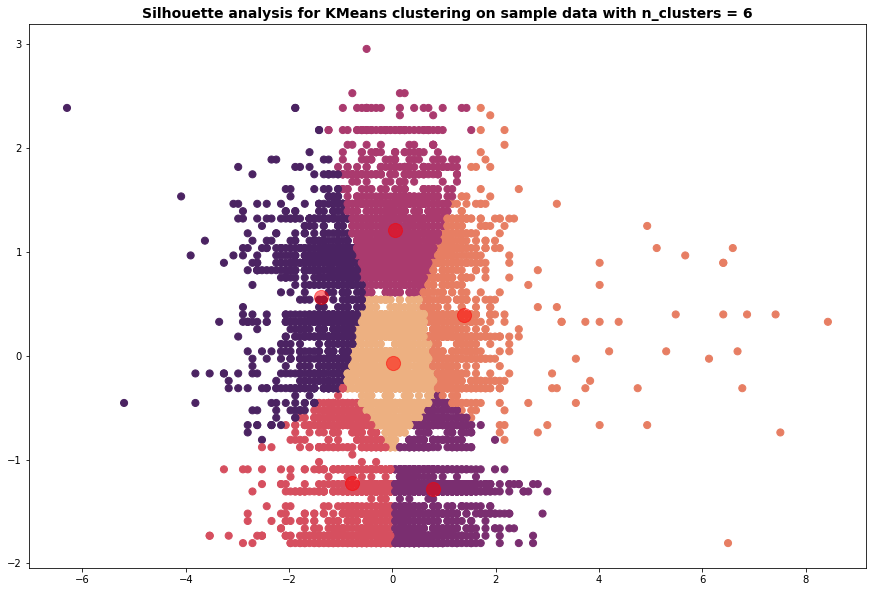

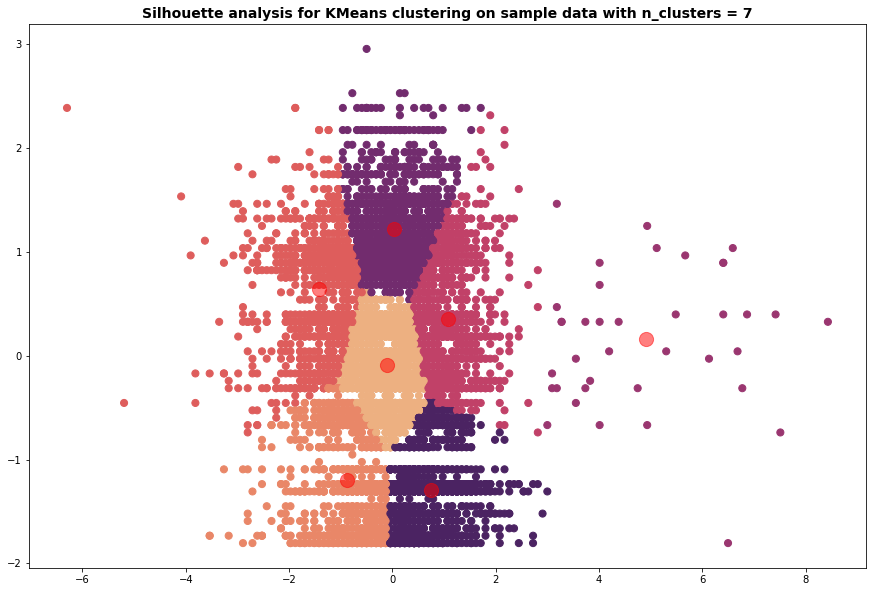

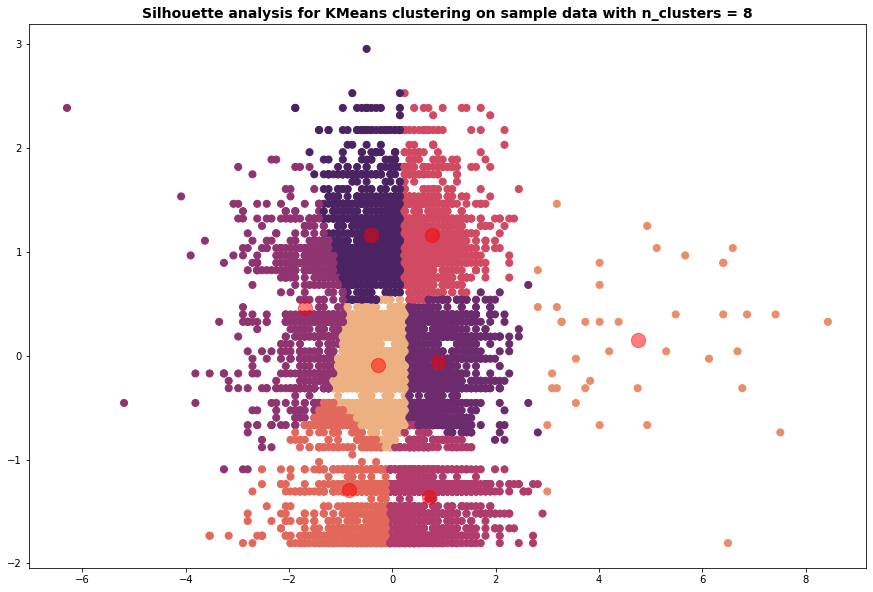

In [62]:
v=2
for i in (2,3,4,5,6,7,8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  y_kmeans= kmeans.predict(X)
  plt.figure(figsize=(15,10))
  n =v+1
  #plt.title('description and listed_in for clusters')
  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='flare')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % i),
                 fontsize=14, fontweight='bold')

## **Let's see the Silhouette scores of different clusters**
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is S=(b−a)max(a,b) .

In [63]:
# Calculate silhoutte score for K-means
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("\nFor n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.35466951027524285

For n_clusters = 3, silhouette score is 0.35490359109307595

For n_clusters = 4, silhouette score is 0.32900214181160253

For n_clusters = 5, silhouette score is 0.3344892445944903

For n_clusters = 6, silhouette score is 0.35639841966691516

For n_clusters = 7, silhouette score is 0.3548756876058297

For n_clusters = 8, silhouette score is 0.350357706999212


We had already seen earlier that k=3 was optimum for k-means clusterning.Further we found that Cluster for 3 is giving best silhouette score, followed by 6,2 and 7. Before reaching to any conclusion, let's keep this information in our memory and move ahead to apply another clustering algorithm called - Heirarhical Clustering.

**Let's implement Heirarchial** clustring Hierarchical clustering is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis.In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.The hierarchical clustering technique has two approaches:

* Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
* Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

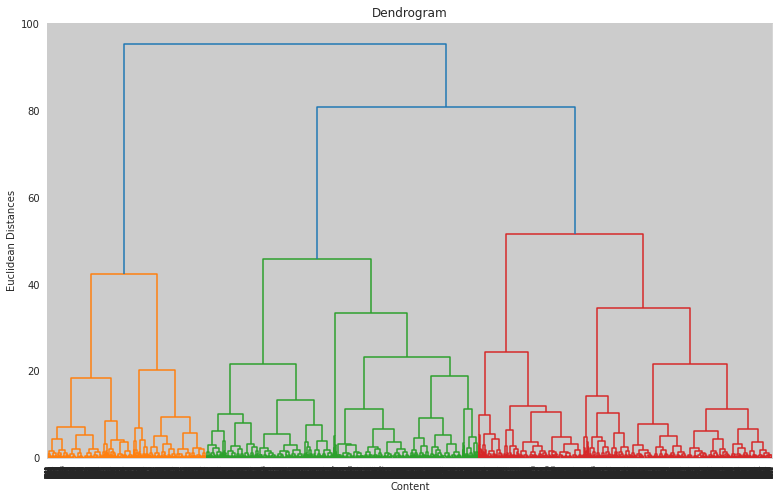

In [64]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
sns.set_style("whitegrid")
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold

No. of Cluster = 3

In [65]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

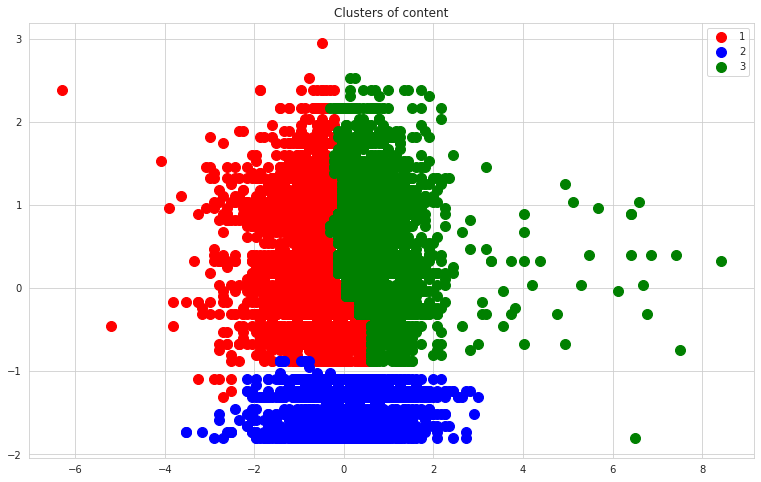

In [66]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')


plt.title('Clusters of content')

plt.legend()
plt.show()

In [67]:
# Calculate silhoutte score for HAC
from sklearn.cluster import AgglomerativeClustering
hac_clusters = [2,3,4,5,6,7,8]
for n_clusters in hac_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)

    score = silhouette_score(X, preds)
    print("\nFor n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.3394022069127177

For n_clusters = 3, silhouette score is 0.31090374177589386

For n_clusters = 4, silhouette score is 0.29525083370730026

For n_clusters = 5, silhouette score is 0.3004793900229635

For n_clusters = 6, silhouette score is 0.3053700959079982

For n_clusters = 7, silhouette score is 0.316369622686931

For n_clusters = 8, silhouette score is 0.32233548702488246


The silhouette score for K-means was in the range of 0.35 while in case of HAC we are getting close to 0.32.

# **Conclussion**
We had performed lots of operations over the dataset to find out some very useful information from it. We have to conclude dataset in few lines, then we can say that.

Netflix has more Movies than TV shows.

Most of the number of Movies and TV shows produced by United States followed by India.

Most of the Content on Netflix (Movies and TV shows combined) is for mature Audienced.

Majority of the movies range in length from 90 to 100 minutes and the majority of TV shows have only one season.

2018 is the year in which Netflix released alot more Content as compared to other years.

Dramas, International movies are the most popular Genres on Netflix.

The silhouette score for K-means was in the range of 0.35 while in case of HAC we are getting close to 0.32.

